In [1]:
import numpy as np
import torch

In [21]:
# Function to plot 1 or more Range 1 Tensors (vectors) in a 2D plane
import matplotlib.pyplot as plt

def plot_vectors(vectors, colours, xlim, ylim):
   # vecors : list of lists/arrays
   # colours : list of colours of vectors on the plt
   # xlim : xlimits tuple
   # ylim : ylimits tuple
   plt.figure()
   plt.axvline(x=0, color='gray')
   plt.axhline(y=0, color='gray')
   plt.xlim(xlim[0],xlim[1])
   plt.ylim(ylim[0],ylim[1])

   for i in range(len(vectors)) :
      x = np.concatenate([[0,0], vectors[i]])
      print(x)
      plt.quiver([x[0]] , [x[1]] , [x[2]] , [x[3]],
                  angles='xy', scale_units='xy', scale=1, color=colours[i])

# function to convert 1 column matrix back to vector
def vectorfy(mtrx, clmn) :
    return np.array(mtrx[:,clmn]).reshape(-1)

In [2]:
X = np.array([[1,2,4],[2,-1,3],[0,5,1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [3]:
np.linalg.det(X)

19.999999999999996

In [4]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [5]:
np.product(lambdas)

19.99999999999999

In [12]:
print(np.linalg.det(X))
print(np.product(lambdas))

f"{np.linalg.det(X):.10f}" == f"{np.product(lambdas):.10f}"

19.999999999999996
19.99999999999999


True

In [13]:
# absolut value of determinant
np.abs(np.linalg.det(X))

19.999999999999996

In [14]:
# Create a basis vector
B = np.array([[1,0],[0,1]])
B

array([[1, 0],
       [0, 1]])

[0 0 1 0]
[0 0 0 1]


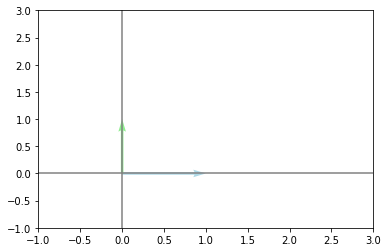

In [23]:
# The plot shows these are orthonormal identity basis vectors
plot_vectors([vectorfy(B,0), vectorfy(B,1)], ['lightblue', 'lightgreen'],(-1,3),(-1,3))

In [24]:
# Apply singular matrix N to these basis vectors
N = np.array([[-4,1],[-8,2.]])
N

array([[-4.,  1.],
       [-8.,  2.]])

In [25]:
np.linalg.det(N)

0.0

In [29]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.])

In [27]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

[0 0 1 0]
[0 0 0 1]
[ 0.  0. -4. -8.]
[0. 0. 1. 2.]


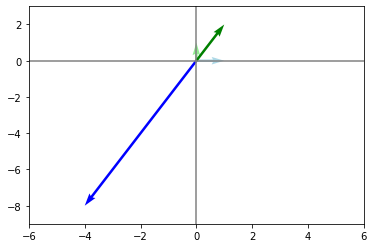

In [28]:
# Shows no more enclosing of a square - the NB has one dimension collapsed
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(NB,0), vectorfy(NB,1)], 
             ['lightblue', 'lightgreen', 'blue', 'green'],(-6,6),(-9,3))

In [30]:
# Apply Matrix J & Plot
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [31]:
np.linalg.det(J)

-1.0

In [32]:
np.abs(np.linalg.det(J))

1.0

In [34]:
# Apply J to B
JB = np.matmul(J,B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [37]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

[0 0 1 0]
[0 0 0 1]
[ 0.   0.  -0.5  0. ]
[0. 0. 0. 2.]


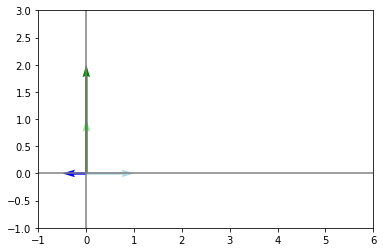

In [36]:
# See that the -ve detrminant has caused the volume to rotate to Sector 2
# Eigenvectors of J - shortened by 0.5 and lengthened by 2 as per eigenvalues of J
# Volume is preserved (1 sq.unit)
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(JB,0), vectorfy(JB,1)], 
             ['lightblue', 'lightgreen', 'blue', 'green'],(-1,6),(-1,3))

In [38]:
# Double the volume
D = np.array([[2,0],[0,2]])
D

array([[2, 0],
       [0, 2]])

In [39]:
np.linalg.det(D)

4.0

In [42]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

In [40]:
DB = np.dot(D,B)
DB

array([[2, 0],
       [0, 2]])

[0 0 1 0]
[0 0 0 1]
[0 0 2 0]
[0 0 0 2]


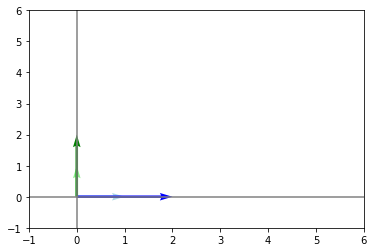

In [41]:
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(DB,0), vectorfy(DB,1)], 
             ['lightblue', 'lightgreen', 'blue', 'green'],(-1,6),(-1,6))